<a href="https://colab.research.google.com/github/tung134245/Kmeans/blob/main/Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [ ]:
df = pd.read_csv('OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)

In [ ]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df = df.dropna()
df.shape

(406829, 8)

In [ ]:
df['Amount'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France,16.60


In [ ]:
df_rfm_m = df.groupby('CustomerID')['Amount'].sum()
df_rfm_m = df_rfm_m.reset_index()
df_rfm_m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [ ]:
#df.InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_date = max(df['InvoiceDate'])
df['Different'] = max_date - df.InvoiceDate
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Different
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,10.20,89 days 04:29:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60,89 days 04:29:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,89 days 04:29:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,89 days 04:29:00


In [ ]:
# Compute last transaction date to get the recency of customers

df_rfm_r = df.groupby('CustomerID')['Different'].min()
df_rfm_r = df_rfm_r.reset_index()
df_rfm_r.Different = df_rfm_r.Different.dt.days
df_rfm_r = pd.DataFrame(df_rfm_r)
df_rfm_r

,CustomerID,Different
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311
...,...,...
4367,18280.0,160
4368,18281.0,4
4369,18282.0,93
4370,18283.0,10


In [ ]:
df_rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
df_rfm_f = df_rfm_f.reset_index()
df_rfm_f.columns = ['CustomerID', 'Frequency']
df_rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
df_rfm = pd.merge(df_rfm_r, df_rfm_f, how = 'inner')
df_rfm = pd.merge(df_rfm, df_rfm_m, how = 'inner')
df_rfm.columns = ['CustomerID','Recency', 'Frequency', 'Monetary']
df_rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,40,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4367,18280.0,160,10,180.60
4368,18281.0,4,7,80.82
4369,18282.0,93,13,176.60
4370,18283.0,10,756,2094.88


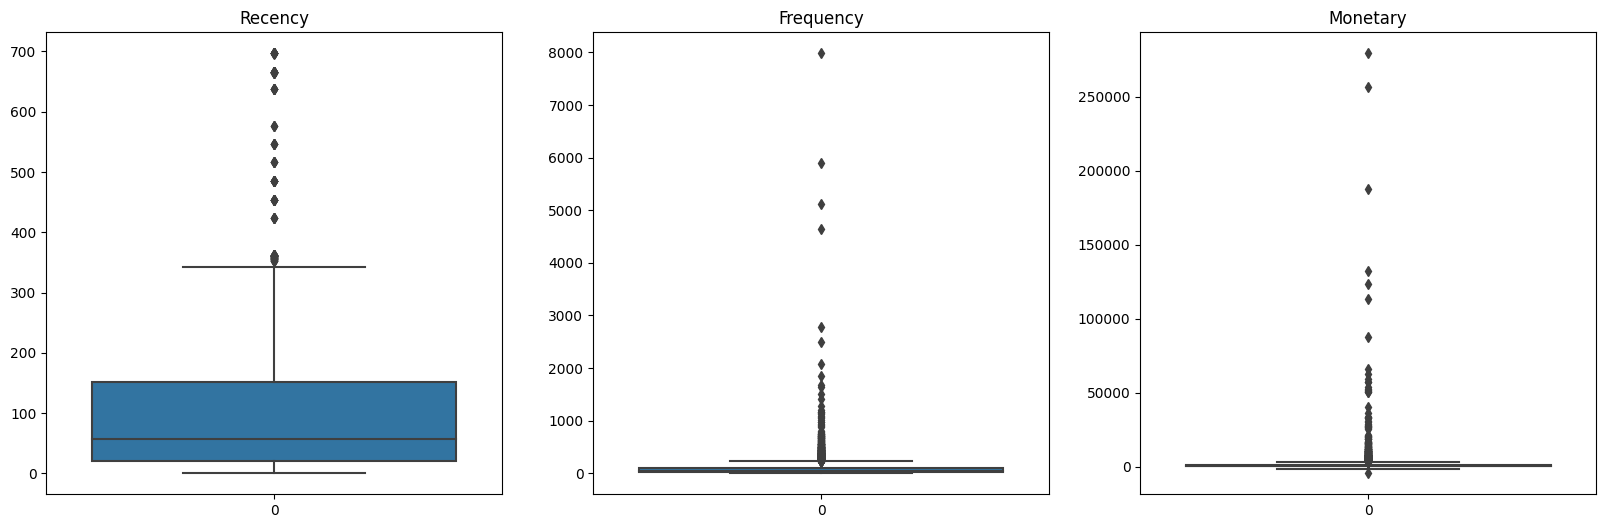

In [ ]:
col = df_rfm.columns[1:]
plt.figure(figsize=(20,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.boxplot(data = df_rfm[col[i]])
    plt.title(col[i])

In [ ]:
df_rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,100.947850,93.053294,1898.459701
std,1722.390705,113.928875,232.471608,8219.345141
min,12346.000000,0.000000,1.000000,-4287.630000
25%,13812.750000,20.000000,17.000000,293.362500
50%,15300.500000,57.000000,42.000000,648.075000
75%,16778.250000,152.000000,102.000000,1611.725000
max,18287.000000,697.000000,7983.000000,279489.020000


In [ ]:
# def remove_outlier(df, list_outlier):
#     for x in list_outlier:
#         Q1 = np.quantile(df[x], 0.15)
#         Q3 = np.quantile(df[x], 0.85)
#         IQR = Q3 - Q1
#         df = df[(df[x] >= Q1 - 1.5*IQR) & (df[x] <= Q3 + 1.5*IQR)]
#     return df

In [ ]:
# df_rfm = remove_outlier(df_rfm, col)

In [ ]:
df_rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,100.947850,93.053294,1898.459701
std,1722.390705,113.928875,232.471608,8219.345141
min,12346.000000,0.000000,1.000000,-4287.630000
25%,13812.750000,20.000000,17.000000,293.362500
50%,15300.500000,57.000000,42.000000,648.075000
75%,16778.250000,152.000000,102.000000,1611.725000
max,18287.000000,697.000000,7983.000000,279489.020000


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

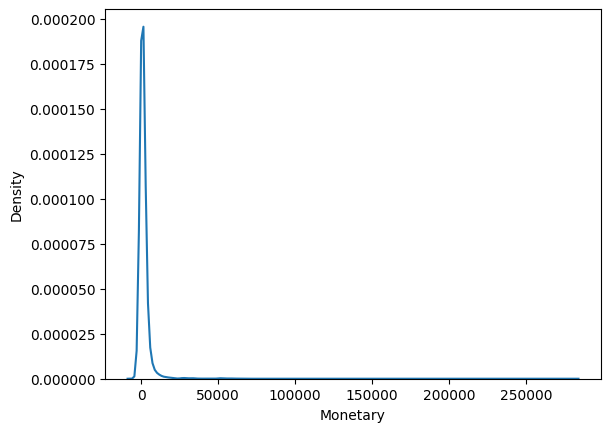

In [ ]:
sns.kdeplot(df_rfm.Monetary)

In [ ]:
df_rfm = df_rfm[col]

# Instantiate
scaler = StandardScaler()
#scaler = MinMaxScaler()

# fit_transform
df_rfm_scaled = scaler.fit_transform(df_rfm)
df_rfm_scaled.shape

(4372, 3)

In [ ]:
df_rfm_scaled = pd.DataFrame(df_rfm_scaled, columns = col)
df_rfm_scaled.head()

,Recency,Frequency,Monetary
0,1.975600,-0.391720,-0.231001
1,-0.535025,0.382657,0.293432
2,-0.219002,-0.266959,-0.012316
3,-0.719372,-0.086271,-0.017146
4,1.843924,-0.327188,-0.190312


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

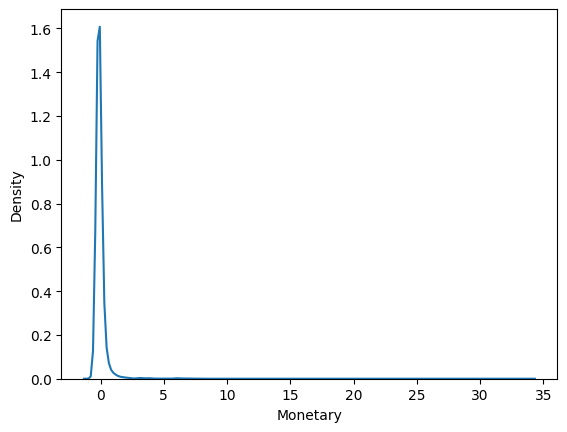

In [ ]:
sns.kdeplot(df_rfm_scaled.Monetary)

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_rfm_scaled)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

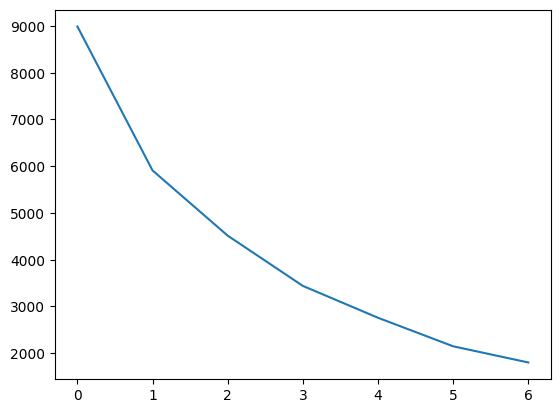

In [ ]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_rfm_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_rfm_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df_rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=2, the silhouette score is 0.9365516646020553


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=3, the silhouette score is 0.5584905263007303


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=4, the silhouette score is 0.5558417669967632


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=5, the silhouette score is 0.5797812041162191


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=6, the silhouette score is 0.5745294432257092


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=7, the silhouette score is 0.5682036603240264


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.4845401215430441


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=2, the silhouette score is 0.9365516646020553


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=3, the silhouette score is 0.5584905263007303


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=4, the silhouette score is 0.5558417669967632


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=5, the silhouette score is 0.5772753990684045


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=6, the silhouette score is 0.5745294432257092


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=7, the silhouette score is 0.5682036603240264


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.4853675321287427


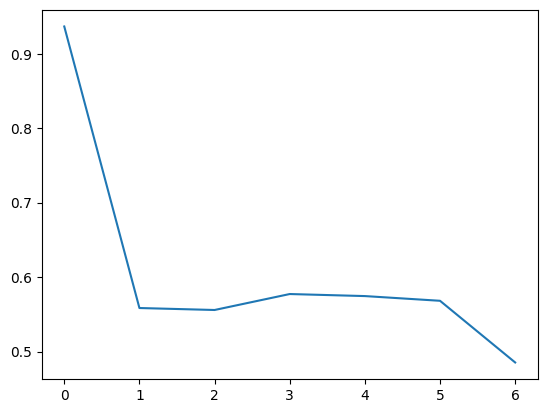

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
X = []
for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_rfm_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df_rfm_scaled, cluster_labels)
    X.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
plt.plot(X)


In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()

,Recency,Frequency,Monetary,Cluster_Id
0,326,2,0.00,1
1,40,182,4310.00,0
2,76,31,1797.24,0
3,19,73,1757.55,0
4,311,17,334.40,1


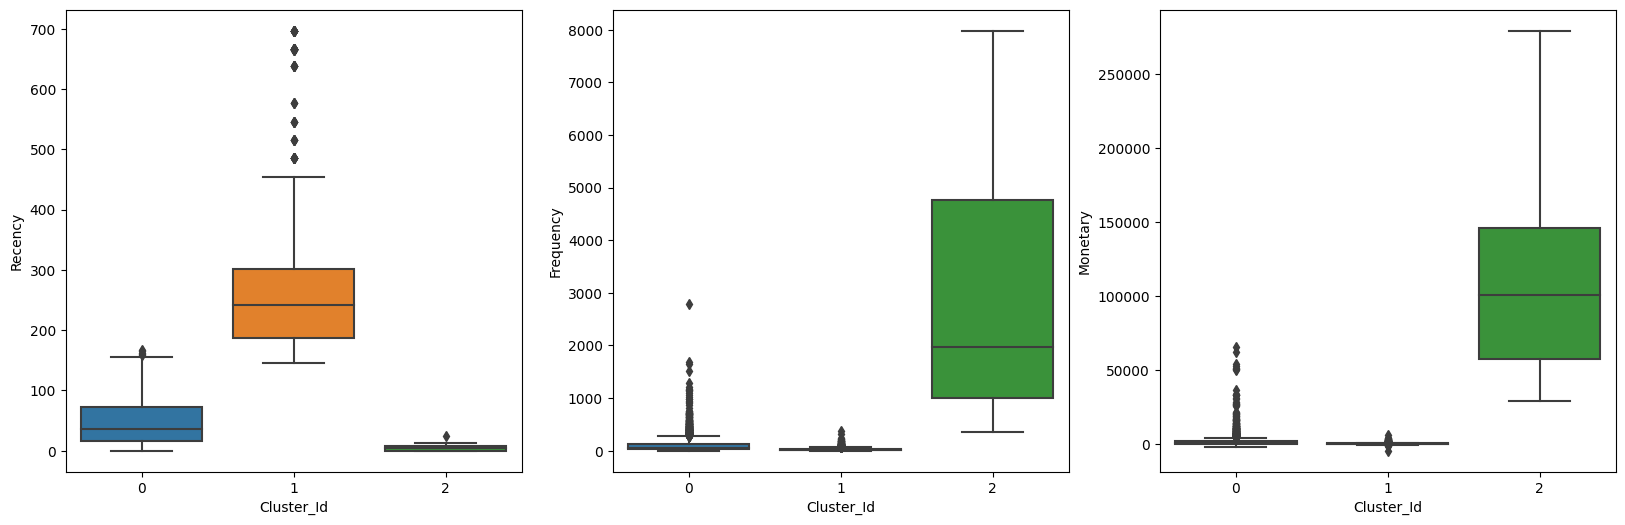

In [ ]:
plt.figure(figsize=(20,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='Cluster_Id', y=col[i], data=df_rfm)

- Khách hàng có Cluster_Id 2 là khách hàng có số lượng giao dịch cao so với các khách hàng khác.
- Khách hàng có Cluster_Id 2 là những người mua hàng nhiều với giá trị giao dịch cao
- Khách hàng có Cluster_Id 0 là những người ít mua hàng kể từ thời điểm bắt đầu, ít quan trọng

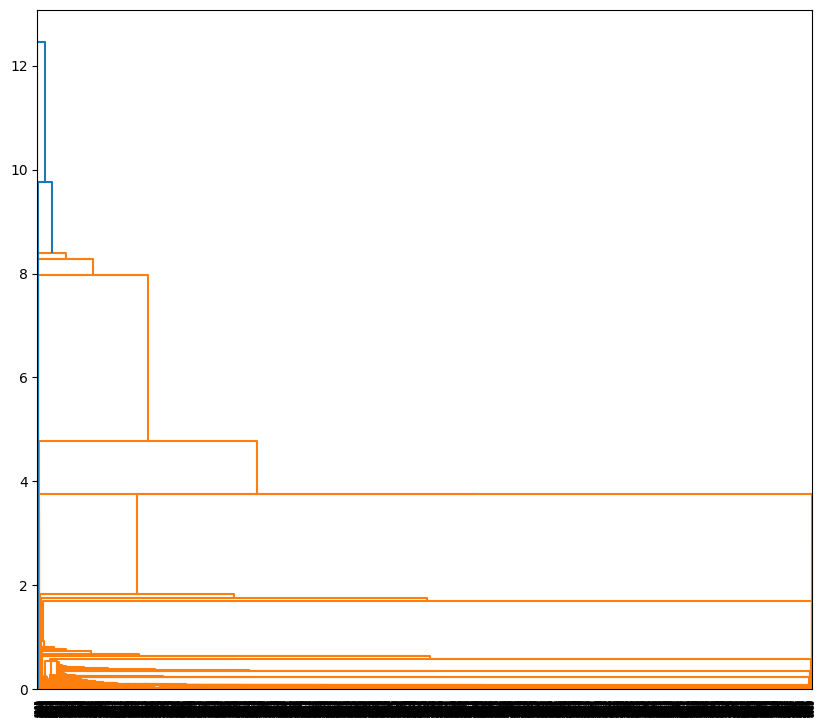

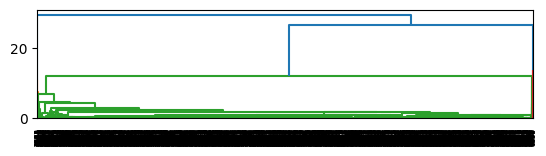

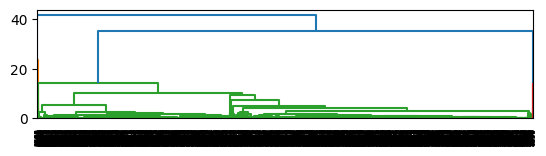

In [ ]:
list_method = ['single', 'average', 'complete']
list_merg = []
plt.figure(figsize=(10,30))
for i in range (3):
    plt.subplot(3,1, i+1)
    mergings = linkage(df_rfm_scaled, method=list_method[i], metric='euclidean')
    list_merg.append(mergings)
    dendrogram(mergings)
    plt.show()

In [ ]:
from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(list_merg[1], n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_rfm['Cluster_Labels'] = cluster_labels
df_rfm.head()

,Recency,Frequency,Monetary,Cluster_Id,Cluster_Labels
0,326,2,0.00,1,0
1,40,182,4310.00,0,0
2,76,31,1797.24,0,0
3,19,73,1757.55,0,0
4,311,17,334.40,1,0


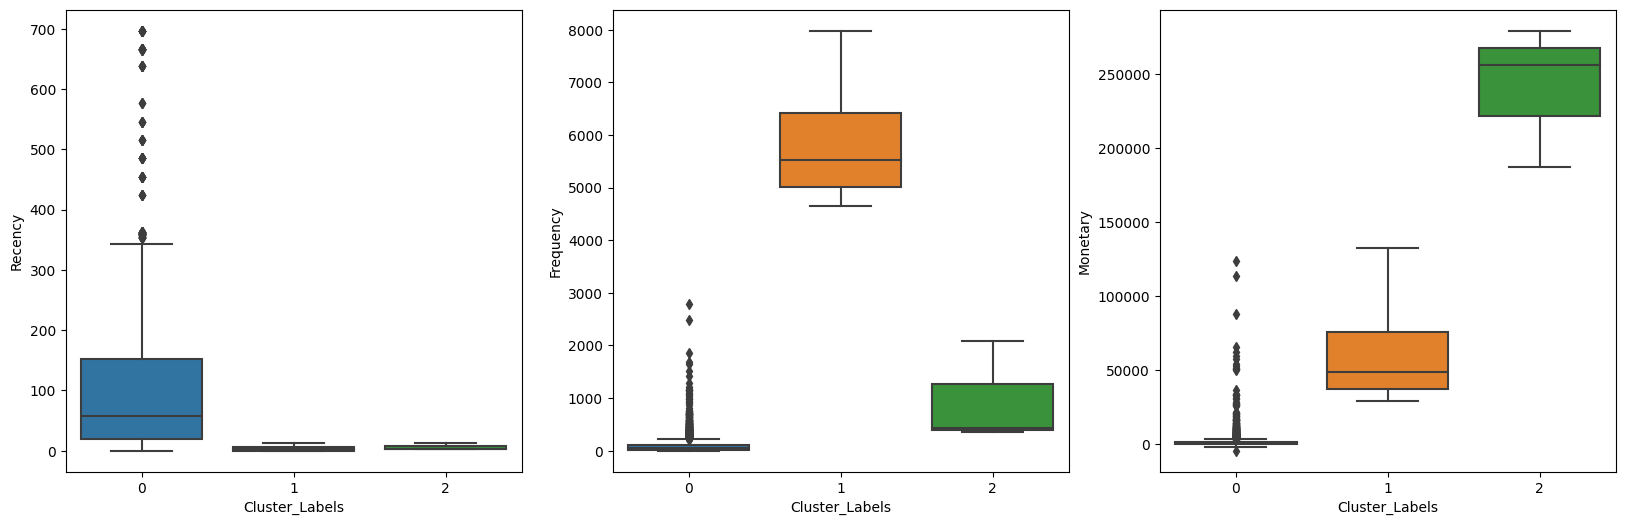

In [ ]:
plt.figure(figsize=(20,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='Cluster_Labels', y=col[i], data=df_rfm)

- Khách hàng với Cluster_labels 1 là những khách hàng có số lượng giao dịch cao so với các khách hàng khác.
- Khách hàng với Cluster_Labels 2 là những người có giá trị giao dịch cao nhất
- Khách hàng với Cluster_Labels 0 không phải là người mua gần đây và do đó ít quan trọng nhất từ quan điểm kinh doanh.